# Instructions

Carefully read through each section of this document. Please answer each question marked with TODO. Some sections require only reading, and other sections require model building and/or evaluation. Read all directions carefully.

In [1]:
# imports

import warnings
warnings.filterwarnings('ignore')

# data imports
import pandas as pd
import numpy as np
from plotnine import *

# modeling imports
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV # Linear Regression Model
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, SplineTransformer #Z-score variables, Polynomial
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error #model evaluation
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut


%matplotlib inline

In [2]:
# creating Amazon model to use for explanations - we've made this model before!

amazon = pd.read_csv("https://raw.githubusercontent.com/katherinehansen2/CPSC392Hansen/main/data/amazon-books.txt", sep="\t")

# drop missing
amazon.dropna(inplace = True)
amazon.reset_index(inplace = True)

# split into X and y
predictors = ["List Price", "NumPages", "Pub year", "Height", "Width", "Thick", "Weight (oz)"]

X = amazon[predictors]
y = amazon["Amazon Price"]

# z score
scaler = StandardScaler()

zscored_values = scaler.fit_transform(X)

X_scaled = pd.DataFrame(zscored_values, columns = X.columns)

lr = LinearRegression()

# fit the model
lr.fit(X_scaled, y)

y_pred = lr.predict(X_scaled)

print("MSE : ", mean_squared_error(y,y_pred))
print("MAE : ", mean_absolute_error(y,y_pred))
print("R2  : ", r2_score(y,y_pred))

MSE :  10.558139257635146
MAE :  2.1457628393685275
R2  :  0.9209941787684587


# Linear Regression



## Sklearn Workflow

Sklearn has a general workflow that is consistent throughout most of their predictive models. The workflow is as follows:

1. Separate your data into X (predictors) and y (outcome), and maybe do some model validation set up.
2. Create an Empty Model.
3. call .fit() using your training data
4. call .predict() on ANY X data (train or test) to get the model prediction for that data.
5. Assess the model

Refer back to this throughout the course to ensure you're following the correct workflow.

## Assumptions of Linear Regression

We spoke about 3 assumptions of linear regression.

1. Linearity
2. Homoskedasticity
3. Normality of Errors

How can we assess these?

### 1. Linearity
We assess linearity in one of two ways:

a. plotting one predictor at a time against the outcome, and see if there are any clear non-linear patterns.

b. plot the predicted values (x-axis) by the residuals (y-axis) and look for clear non-linear patterns

In [3]:
# a.
for c in predictors:
    t = "Amazon Price vs. " + c
    print(ggplot(amazon, aes(x = c, y = "Amazon Price"))
    + geom_point()
    + theme_minimal()
    + labs(title = t))

**TODO:**

Which variables are following the assumption of linearity? Which are not?

In [4]:
# b.
assump = pd.DataFrame({"errors": y - y_pred,
                      "pred": y_pred})
(ggplot(assump, aes(x = "pred", y = "errors")) +
 geom_point() +
 theme_minimal() +
 geom_hline(yintercept = 0, linetype = "dashed", size = 1, color = "red"))

### Homoskedasticity

We assess Homoskedasticity using the same plot (remember homo = same, hetero = different; skedasticity refers to the variance of the errors).

In [5]:
(ggplot(assump, aes(x = "pred", y = "errors")) +
 geom_point() +
 theme_minimal() +
 geom_hline(yintercept = 0, linetype = "dashed", size = 1, color = "red"))

**TODO:**

Looking at this residual plot, are there some areas along the x-axis where errors are huge, and others where they are small? We don't need it to be exactly the same, but are there any noticeable patterns?

### 3. Normality
Normality doesnt really impact prediction, in fact many argue it doesnt even impact inference (p-values/confidence intervals). So we won't dwell on it here. Here's code to check it using something called a QQ (Quantile-Quantile plot). We want to see whether there are large deviations from the red diagonal line (small deviations are expected at the two ends).

[More on Normality](https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html)

In [6]:
# We won't normally check this in this class
(ggplot(assump, aes(sample = "errors")) +
stat_qq() + theme_minimal() + geom_abline(intercept = 0,
                                          slope = np.std(assump["errors"]),
                                          color = "red"))

## Your Turn!
**TODO:**

Build a linear regression model using the wineLARGE data available on GitHub. Your goal is to predict the quality of wine using the predictors laid out below. Make sure to **check to see if the data is following the assumptions of linear regression**, get rid of any missing values, and do a train-test split. Evaluate your model's performance on both training and testing data.

In [20]:
d = pd.read_csv("https://raw.githubusercontent.com/katherinehansen2/CPSC392Hansen/refs/heads/main/data/wineLARGE.csv")

predictors = ['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates']

# get rid of missing values


# X and y


# train-test split


# z score predictors


# create regression


# fit model


In [ ]:
# evaluate model


**TODO:**

How well did your model perform?

 # Feature Engineering

 Let's build a polynomial regression model. Run the following code to get an idea of what's happening with PolynomialFeatures() under the hood.

In [7]:
# randomly generated data
df = pd.DataFrame({"x" : np.random.normal(size = 100),
                  "y" : np.random.normal(size = 100),
                  "z" : np.random.normal(size = 100)
                  })

n = 3 # n = number of degrees
p = PolynomialFeatures(degree = n, include_bias = False)

df_new = pd.DataFrame(p.fit_transform(df))
df_new.columns = p.get_feature_names_out(df.columns)
df_new.head()

What new columns were added? You should notice that PolynomialFeatures() creates columns for each `x` `y` and `z` up to the specified degree (3 for us). You'll also notice that it includes up to n-degree interations between each variable as well. If you build a Linear Regression model on the new df_new dataframe, you'll be running a polynomial regression!

If you'd like just the interactions, and not the polynomial features, you can add the argument `interaction_only = True`. Try it out.

In [6]:
# TODO: Try PolynomialFeatures() with interaction_only = True. Check which columns it creates.



Let's build a PolynomialFeatures() for the chicken fingers dataset. This dataset shows the number of chicken fingers that a subject has (0-10) and their happiness (~-3 - ~3). I have already fit a LinearRegression() model for you, but you might notice that it's not doing a very good job at predicting.

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/katherinehansen2/CPSC392Hansen/refs/heads/main/data/07_cw.csv")

# drop missing values
df.dropna(inplace = True)
df.reset_index(inplace = True)

# set up X and y
predictors = ["ChickenFingers"]

X = df[predictors]
y = df["Happiness"]

# z score

scaler = StandardScaler()

zscored_values = scaler.fit_transform(X)

X_scaled = pd.DataFrame(zscored_values, columns = X.columns)

# fit a LinearRegression()

lr = LinearRegression()

# fit
lr.fit(X_scaled, y)

# predict
y_pred = lr.predict(X_scaled)

# assess
print("MSE : ", mean_squared_error(y, y_pred))
print("MAE : ", mean_absolute_error(y, y_pred))
print("R2  : ", r2_score(y, y_pred))

In [11]:
(ggplot(df, aes(x = "ChickenFingers", y = "Happiness")) + geom_point() +
 labs(x = "X", y = "Y", title = "Linear Regression") +
  geom_smooth(method = "lm", se = False, color = "blue", size = 2) +
  theme_minimal())

**TODO:**

Which assumption is this model violating?

**TODO:**

Use PolynomialFeatures() to create polynomial features with an appropriate degree. Then, fit a new LinearRegression() model on the new df. Evaluate it and see if it does any better at predicting.

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/katherinehansen2/CPSC392Hansen/refs/heads/main/data/07_cw.csv")

# drop missing values
df.dropna(inplace = True)
df.reset_index(inplace = True)

# set up X and y
predictors = ["ChickenFingers"]

X = df[predictors]
y = df["Happiness"]

# z score

scaler = StandardScaler()

zscored_values = scaler.fit_transform(X)

X_scaled = pd.DataFrame(zscored_values, columns = X.columns)


# fit a PolynomialFeatures()
n = # TODO
p = PolynomialFeatures(degree = n, include_bias = False)

X_new = pd.DataFrame(p.fit_transform(X))
X_new.columns = p.get_feature_names_out(X.columns)

# fit a LinearRegression()

lr = LinearRegression()

# fit on correct data
lr.fit(# TODO)

# predict
y_pred = lr.predict(X_new)

# assess
print("MSE : ", mean_squared_error(y, y_pred))
print("MAE : ", mean_absolute_error(y, y_pred))
print("R2  : ", r2_score(y, y_pred))

Which model does better, the regular linear regression or the polynomial regression?

Run the code below to see a plot of the new regression line

In [13]:
def poly(x, degree=1):
    """
    from: https://stackoverflow.com/questions/63344621/fit-non-linear-curve-using-plotnine
    Fit Polynomial

    These are non orthogonal factors, but it may not matter if
    we only need this for smoothing and not extrapolated
    predictions.
    """
    d = {}
    for i in range(degree+1):
        if i == 1:
            d['x'] = x
        else:
            d[f'x**{i}'] = np.power(x, i)
    return pd.DataFrame(d)

(ggplot(df, aes(x = "ChickenFingers", y = "Happiness")) + geom_point() +
 labs(x = "X", y = "Y", title = "Polynomial Regression (d = 2)") +
  geom_smooth(method = "lm", se = False, formula = 'y ~ poly(x, degree=n)', color = "blue", size = 2) +
  theme_minimal())

### An additional PolynomialFeatures practice

Please attempt this one if you feel you need more practice with PolynomialFeatures. Or, move on to the next sections and come back to this one when you have time.


Let's take a look at some census data looking at the age, sex, and salary for programmers in the 2000s (from here: https://github.com/matloff/qeML). Download the data from Canvas and upload it to Colab, then read it in use pd.read_csv().

Load in the Data.

Plot the age (x-axis) and wageinc (y-axis) using plotnine/ggplot.

Fit a LinearRegression() model to predict wageinc based on age, and print out the MSE, MAE, and R2.

Create a residual plot (predicted value on x-axis, residual/error on y-axis). Does this data violate the assumptions of linearity?

Fit a LinearRegression() model with PolynomialFeatures() up to degree = 2, and print out the MSE, MAE, and R2.
Fit a LinearRegression() model with PolynomialFeatures() up to degree = 3, and print out the MSE, MAE, and R2.

Did adding Polynomial Features to your model help improve the fit?

In [ ]:
# TODO: See instructions above



# Extrapolation

**TODO:**

What is extrapolation? Why is it dangerous?

# The Bias-Variance Tradeoff

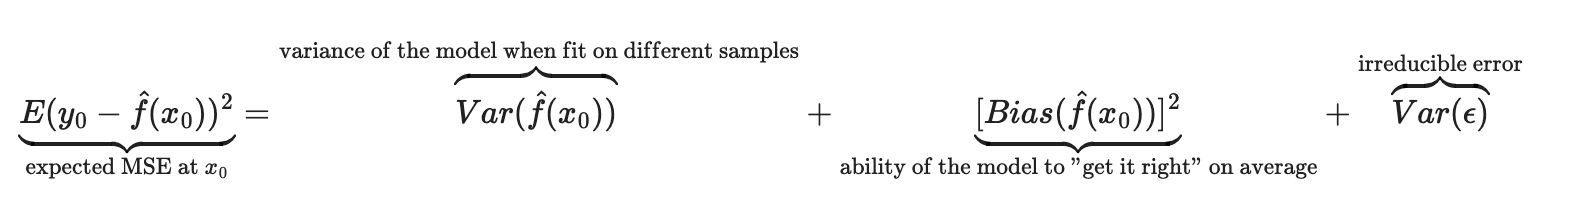

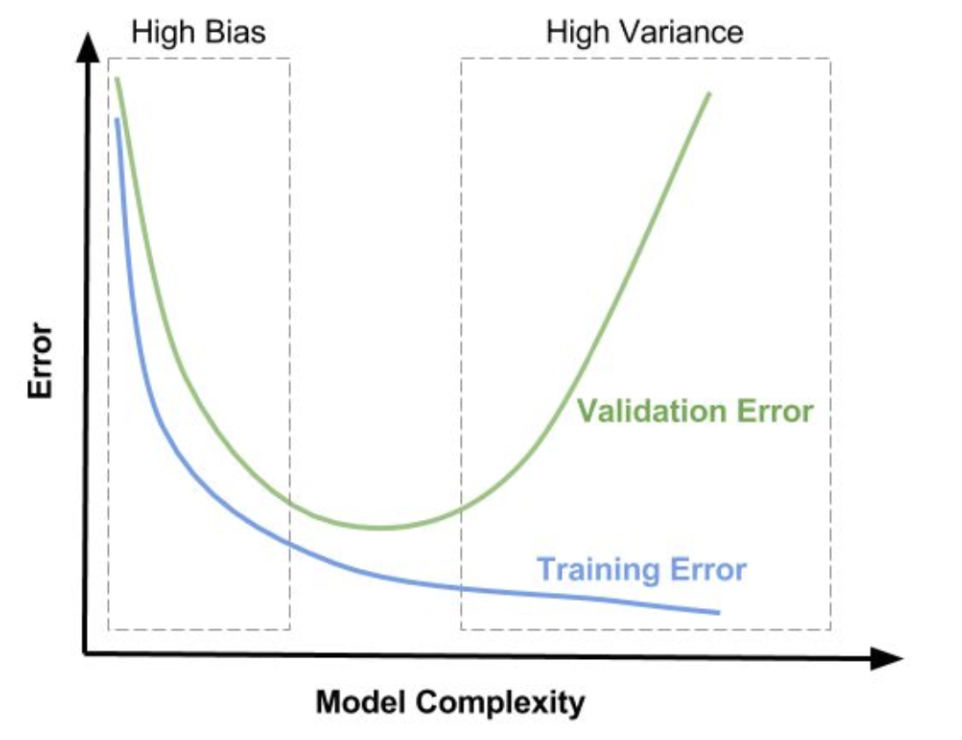

## Overfitting

**TODO:**

What is overfitting?

How is it different from extrapolation?

What are we looking for when we are checking for overfitting?

## Model Validation

* Train Test Split (TTS): We take our data and break it up into two groups, training (used to fit model) and testing (used to see how the model does on data it has never seen before)
* K-Fold Cross Validation (KF): We take our data and break it up into K groups. We train K different models using a different group as the test set each time. The other K-1 groups are used to train the model.
* Leave One Out Cross Validation (LOO): Like K-Fold but each data point is it's own fold. This means we fit N models (where N is the number of data points) using N-1 data points to train, and 1 data point to test.


We've already practiced a TTS in class, so now it's time to practice the other two. Please review the code below for K-fold and LOO using the Amazon data.

In [14]:
# K-Fold

# Load
amazon = pd.read_csv("https://raw.githubusercontent.com/katherinehansen2/CPSC392Hansen/main/data/amazon-books.txt", sep="\t")

# drop missing
amazon.dropna(inplace = True)
amazon.reset_index(inplace = True)

# split into X and y
predictors = ["List Price", "NumPages", "Pub year", "Height", "Width", "Thick", "Weight (oz)"]

X = amazon[predictors]
y = amazon["Amazon Price"]

# z score
scaler = StandardScaler()

zscored_values = scaler.fit_transform(X)

X_scaled = pd.DataFrame(zscored_values, columns = X.columns)

lr = LinearRegression()

# validation
kf = KFold(5)

mse = {"train": [], "test": []}
mae = {"train": [], "test": []}


for train, test in kf.split(X):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y[train]
    y_test  = y[test]

    # fit
    lr.fit(X_train,y_train)

    # predict
    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)

    # assess
    mse["train"].append(mean_squared_error(y_train,y_pred_train))
    mse["test"].append(mean_squared_error(y_test,y_pred_test))

    mae["train"].append(mean_absolute_error(y_train,y_pred_train))
    mae["test"].append(mean_absolute_error(y_test,y_pred_test))

print("Train MSEs:", mse["train"])
print("Test MSEs :", mse["test"])
print("Mean Train MSE :", np.mean(mse["train"]))
print("Mean Test MSE  :", np.mean(mse["test"]))

In [15]:
# Leave One Out

# Load
amazon = pd.read_csv("https://raw.githubusercontent.com/katherinehansen2/CPSC392Hansen/main/data/amazon-books.txt", sep="\t")

# drop missing
amazon.dropna(inplace = True)
amazon.reset_index(inplace = True)

# split into X and y
predictors = ["List Price", "NumPages", "Pub year", "Height", "Width", "Thick", "Weight (oz)"]

X = amazon[predictors]
y = amazon["Amazon Price"]

# z score
scaler = StandardScaler()

zscored_values = scaler.fit_transform(X)

X_scaled = pd.DataFrame(zscored_values, columns = X.columns)

lr = LinearRegression()

# validation
kf = LeaveOneOut()

mse = {"train": [], "test": []}
mae = {"train": [], "test": []}


for train, test in kf.split(X):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y[train]
    y_test  = y[test]

    # fit
    lr.fit(X_train,y_train)

    # predict
    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)

    # assess
    mse["train"].append(mean_squared_error(y_train,y_pred_train))
    mse["test"].append(mean_squared_error(y_test,y_pred_test))

    mae["train"].append(mean_absolute_error(y_train,y_pred_train))
    mae["test"].append(mean_absolute_error(y_test,y_pred_test))


print("Train MSEs:", mse["train"])
print("Test MSEs :", mse["test"])
print("Train MSE :", np.mean(mse["train"]))
print("Test MSE  :", np.mean(mse["test"]))

# Regularization

Now that we know how to use model validation to check for overfitting, we might want to help fix overfitting. We do this using regularization, which helps take a model thats to the righthand side of our Bias Variance graph and move it towards the center by making our model simpler.




One way we can do that is by penalizing the coefficients of our model if they're too large in magnitude (far away from 0 in either direction).

## LASSO
LASSO penalizes the sum of the *absolute value* of the coefficients by adding a penalty term to the loss function:

$$ \underbrace{\text{SSE}}_{\sum(x_i - \hat{x_i})^2} + \lambda \sum | \beta_i |$$

LASSO has the benefit of tending to drag coefficients that don't "pull their weight" to *exactly* 0, thus removing them from the model.

## Ridge
Ridge penalizes the sum of the *squared* coefficients by adding a penalty term to the loss function:

$$ \underbrace{\text{SSE}}_{\sum(x_i - \hat{x_i})^2} + \lambda \sum  \beta_i^2$$

Unlike LASSO, Ridge tends to drag coefficients that don't "pull their weight" to *near* 0, thus NOT removing them from the model.

## Penalties in General
Both models create a tug-of-war where coefficients ($\beta_i$) need to "pull their weight" by reducing the Sum of Squared Errors ($\text{SSE}$) in order to be "worth" having a large value in the penalty.

The hyperparameter $\lambda$ controls how *much* coefficients are penalized.

**TODO:**

If $\lambda = 0$, what happens to our model?

## Alternative Regularization Explanation

You can also think of LASSO and Ridge as having a "budget" for how big the sum of your (squared or absolute valued) coefficients can be.

<img src="https://drive.google.com/uc?export=view&id=1-u4GfH6eZg6T0wF1h3M5bjmd8SrMQHcC" width = "400"/>

This graph shows the concept of LASSO and RIDGE in a simple 2-parameter situation. The teal/blue circle (right) and square (left) represent the values for $\beta_1$ and $\beta_2$ that satisfy the "budget" for our coefficients. The dot in the middle of the red rings represents what the coefficients would be if we did not add a penalty at all. As you move from the inner to the outer red rings, the Residual Sums of Squares (RSS) goes up, meaning that our model is worse at accurately predicting data in our sample (remember that we're giving up accuracy in the *current* sample, to hopefully gain accuracy out-of-sample).

You can see that the coefficients chosen by LASSO/Ridge occur at the point of the teal/blue area that meets the red rings. This is because 1) when we penalize our model, it HAS to fit within the contraints we give it (the teal/blue area) but 2) we still want the RSS to be as small as possible (a model that's bad on ALL data sets isn't useful).

**TODO:**

Looking at this chart, explain why you think LASSO has a tendency to send coefficients to exactly 0, while Ridge has a tendency to send them close to, but not exactly, 0.

## How do you choose between LASSO and Ridge?

In general: if you want to do variable selection (i.e. completely remove some variables), choose LASSO. But in the real world, people often use something called ElasticNet, which adds both LASSO (L1) *and* Ridge (L2) penalties to the loss function (see [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html)).

**TODO:**

We've already fit a LASSO and Ridge regression model on the Amazon data in class. Edit that code to fit an ElasticNet model instead.

In [ ]:
# TODO: See instructions above



**TODO:**

Now, let's put all of our knowledge together to build a new model.

* Using [this data](https://raw.githubusercontent.com/katherinehansen2/CPSC392Hansen/main/data/kc_house_data.csv), build a simple linear regression model to predict `price` based on `sqft_living`, and `yr_built` using TTS. Make sure to z-score your continuous/interval variables. Print out the train and test MSE and R2.

* Then, build a LinearRegression using PolynomialFeatures(). Print out the train and test MSE and R2. Does this data require the use of PolynomialFeatures()?

* Then, build 3 simple LinearRegression() models using LASSO, Ridge, and ElasticNet. Print out the train and test MSE and R2. Which performs the best?

* Then, repeat that process using K-Fold and LOO Validation.

Once you've completed all models, let me know which one worked the best. How did you make that decision?

